<a href="https://colab.research.google.com/github/jana-nf/Pandas_Python_25/blob/main/Pandas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [1]:
import pandas as pd
df = pd.read_csv("/content/interviews.csv")

print(df.shape)
df.head()

(17654, 10)


,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Apple,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,Application I applied through a staffing agen...
1,Apple,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Apple,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Apple,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Apple,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


In [2]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1iP19kdnES7sffFdfznuegG_eYpI8Qu6gnngckr_pNJ0/edit#gid=0


In [3]:
# Get the column `date`, 1000 loops
%timeit -n1000 df["Date"]

# Get the first row, 1000 loops
%timeit -n1000 df.iloc[0]

2.12 µs ± 312 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
37.4 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [4]:
%timeit -n1 df.apply(lambda x: x["Experience"] * x["Upvotes"], axis=1)

141 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit -n1 [row for index, row in df.iterrows()]

623 ms ± 105 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# This is what a row looks like as a pandas object
for index, row in df.iterrows():
    print(row)
    break

Company                                                   Apple
Title                                         Software Engineer
Job                                           Software Engineer
Level                                                  Engineer
Date                                                Aug 7, 2019
Upvotes                                                       0
Offer                                                  No offer
Experience                                                  0.0
Difficulty                                               Medium
Review        Application  I applied through a staffing agen...
Name: 0, dtype: object


In [7]:
%timeit -n1 [row for row in df.itertuples()]

24.3 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# This is what a row looks like as a namedtuple.
for row in df.itertuples():
    print(row)
    break

Pandas(Index=0, Company='Apple', Title='Software Engineer', Job='Software Engineer', Level='Engineer', Date='Aug 7, 2019', Upvotes=0, Offer='No offer', Experience=0.0, Difficulty='Medium', Review='Application  I applied through a staffing agency. I interviewed at Apple (Sunnyvale, CA) in March 2019.  Interview  The interviewer asked me about my background. Asked few questions from the resume. Asked about my proficiency on data structures. Asked me how do you sort hashmap keys based on values.  Interview Questions Write a program that uses two threads to print the numbers from 1 to n.')


In [9]:
# Now, iterating through our DataFrame is 100x faster.
%timeit -n1 df_np = df.to_numpy(); rows = [row for row in df_np]

4.84 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
df_np = df.to_numpy()
%timeit -n1000 df_np[0]
%timeit -n1000 df_np[:,0]

154 ns ± 10.7 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
222 ns ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [11]:
%timeit -n1000 df["Review"][0]
%timeit -n1000 df.iloc[0]["Review"]
%timeit -n1000 df.loc[0, "Review"]

4.66 µs ± 940 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)
47.7 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
6.88 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
# Example 1: Changing the review of the first row.
df["Review"][0] = "I like Orange better."
# Even though with the warning, the assignment works. The review is updated.
df.head(1)

/tmp/ipython-input-159866291.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Review"][0] = "I like Orange better."
/tmp/ipython-input-159866291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Apple,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.


In [13]:
# Example 2: Changing the company name Apple to Orange.
df[df["Company"] == "Apple"]["Company"] = "Orange"
# With the warning, the assignment doesn't work. The company name is still Apple.
df.head(1)

/tmp/ipython-input-2314620877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["Company"] == "Apple"]["Company"] = "Orange"


,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Apple,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.


In [16]:
df["Review"][0] = "I like Orange better."
# can be understood as
df.__getitem__("Review").__setitem__(0, "I like Orange better.")

/tmp/ipython-input-1193506038.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Review"][0] = "I like Orange better."
/tmp/ipython-input-1193506038.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [17]:
df[df["Company"] == "Apple"]["Company"] = "Orange"
# can be understood as
df.__getitem__(where df["Company"] == "Apple").__setitem__("Company", "Orange")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1767859153.py, line 3)

In [18]:
df.loc[df["Company"] == "Apple", "Company"] = "Orange"
df.head()

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.
1,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


In [19]:
# Changing the review of the first row.
df.loc[0, "Review"] = "Orange is love. Orange is life."
df.head()

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,Orange is love. Orange is life.
1,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


In [20]:
# Changing the company name Apple to Orange.
df.loc[df["Company"] == "Apple", "Company"] = "Orange"
df.head()

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,Orange is love. Orange is life.
1,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


In [22]:
pd.set_option("mode.chained_assignment", "raise")
# Running this will show you an Exception
# df["Review"][0] = "I like Orange better." # Original problematic line
df.loc[0, "Review"] = "I like Orange better." # Corrected line using .loc
df.head()

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.
1,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...


In [23]:
# Accessing the third row of a `DataFrame`.
df.iloc[3]

,3
Company,Orange
Title,Software Engineer
Job,Software Engineer
Level,Engineer
Date,NaN
Upvotes,9
Offer,Declined offer
Experience,-1.0
Difficulty,Medium
Review,Application The process took a week. I interv...


In [24]:
# Selecting the last 6 rows
df.iloc[-6:]

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
17648,Tencent,Software Engineer,Software Engineer,Engineer,"Nov 4, 2012",0,No offer,NaN,NaN,Application I applied online. The process too...
17649,Tencent,Software Engineer,Software Engineer,Engineer,"May 25, 2012",0,Declined offer,0.0,Medium,Application I applied online. The process too...
17650,Tencent,Software Engineer,Software Engineer,Engineer,"Mar 15, 2014",0,No offer,NaN,NaN,Application I applied through college or univ...
17651,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 22, 2015",0,Accepted offer,1.0,Medium,Application I applied through college or univ...
17652,Tencent,Software Engineer,Software Engineer,Engineer,"Jul 4, 2017",0,Declined offer,1.0,Medium,Application I applied through college or univ...
17653,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 30, 2016",0,Declined offer,0.0,Easy,Application I applied online. The process too...


In [25]:
# Selecting 1 from every 2 rows in the last 6 rows
df.iloc[-6::2]

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
17648,Tencent,Software Engineer,Software Engineer,Engineer,"Nov 4, 2012",0,No offer,NaN,NaN,Application I applied online. The process too...
17650,Tencent,Software Engineer,Software Engineer,Engineer,"Mar 15, 2014",0,No offer,NaN,NaN,Application I applied through college or univ...
17652,Tencent,Software Engineer,Software Engineer,Engineer,"Jul 4, 2017",0,Declined offer,1.0,Medium,Application I applied through college or univ...


In [26]:
df.loc[df["Offer"] == "Declined offer"]
# This is equivalent to:
# mask = df["Offer"] == "Declined offer"
# df.loc[mask]

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
7,Orange,Software Engineer,Software Engineer,Engineer,"Jul 26, 2019",1,Declined offer,-1.0,Medium,Application The process took 4+ weeks. I inte...
17,Orange,Software Engineer,Software Engineer,Engineer,"Feb 27, 2010",7,Declined offer,-1.0,Medium,Application The process took 1 day. I intervi...
65,Orange,Software Engineer,Software Engineer,Engineer,"May 6, 2012",1,Declined offer,1.0,Easy,Application The process took 2 days. I interv...
...,...,...,...,...,...,...,...,...,...,...
17643,Tencent,Software Engineer,Software Engineer,Engineer,"Apr 9, 2016",0,Declined offer,1.0,Medium,Application I applied online. I interviewed a...
17646,Tencent,Software Engineer,Software Engineer,Engineer,"May 28, 2010",0,Declined offer,0.0,Easy,Application I applied through an employee ref...
17649,Tencent,Software Engineer,Software Engineer,Engineer,"May 25, 2012",0,Declined offer,0.0,Medium,Application I applied online. The process too...
17652,Tencent,Software Engineer,Software Engineer,Engineer,"Jul 4, 2017",0,Declined offer,1.0,Medium,Application I applied through college or univ...


In [27]:
# Adding label "Hardware" if the company name is "Orange", "Dell", "IDM", or "Siemens".
# "Orange" because we changed "Apple" to "Orange" above.
# Adding label "Software" otherwise.

def company_type(x):
    hardware_companies = set(["Orange", "Dell", "IBM", "Siemens"])
    return "Hardware" if x["Company"] in hardware_companies else "Software"
df["Type"] = df.apply(lambda x: company_type(x), axis=1)

# Setting "Type" to be labels. We call ""
df = df.set_index("Type")
df
# Label columns aren't considered part of the DataFrame's content.
# After adding labels to your DataFrame, it still has 10 columns, same as before.

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
Type,,,,,,,,,,
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...
...,...,...,...,...,...,...,...,...,...,...
Software,Tencent,Software Engineer,Software Engineer,Engineer,"May 25, 2012",0,Declined offer,0.0,Medium,Application I applied online. The process too...
Software,Tencent,Software Engineer,Software Engineer,Engineer,"Mar 15, 2014",0,No offer,NaN,NaN,Application I applied through college or univ...
Software,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 22, 2015",0,Accepted offer,1.0,Medium,Application I applied through college or univ...


In [28]:
# Selecting rows with label "Hardware"
df.loc["Hardware"]

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
Type,,,,,,,,,,
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
Hardware,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...
...,...,...,...,...,...,...,...,...,...,...
Hardware,IBM,Senior Software Engineer,Software Engineer,Senior,"Sep 20, 2015",0,No offer,-1.0,Easy,Application I applied through a recruiter. Th...
Hardware,IBM,Senior Software Engineer,Software Engineer,Senior,"Sep 14, 2015",0,Accepted offer,-1.0,Medium,Application I applied in-person. The process ...
Hardware,IBM,Senior Software Engineer,Software Engineer,Senior,"Aug 6, 2015",0,Accepted offer,1.0,Hard,Application I applied through a recruiter. Th...


In [29]:
# To drop a label, you need to use reset_index with drop=True
df.reset_index(drop=True, inplace=True)
df

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review
0,Orange,Software Engineer,Software Engineer,Engineer,"Aug 7, 2019",0,No offer,0.0,Medium,I like Orange better.
1,Orange,Software Engineer,Software Engineer,Engineer,"Aug 8, 2019",0,Accepted offer,1.0,Hard,Application I applied online. The process too...
2,Orange,Software Engineer,Software Engineer,Engineer,NaN,0,Declined offer,0.0,Medium,Application The process took 4 weeks. I inter...
3,Orange,Software Engineer,Software Engineer,Engineer,NaN,9,Declined offer,-1.0,Medium,Application The process took a week. I interv...
4,Orange,Software Engineer,Software Engineer,Engineer,"May 29, 2009",2,No offer,0.0,Medium,Application I applied through an employee ref...
...,...,...,...,...,...,...,...,...,...,...
17649,Tencent,Software Engineer,Software Engineer,Engineer,"May 25, 2012",0,Declined offer,0.0,Medium,Application I applied online. The process too...
17650,Tencent,Software Engineer,Software Engineer,Engineer,"Mar 15, 2014",0,No offer,NaN,NaN,Application I applied through college or univ...
17651,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 22, 2015",0,Accepted offer,1.0,Medium,Application I applied through college or univ...
17652,Tencent,Software Engineer,Software Engineer,Engineer,"Jul 4, 2017",0,Declined offer,1.0,Medium,Application I applied through college or univ...


In [30]:
series = df.Company
# The first 1000 companies, picking every 100th companies
series[:1000:100]

,Company
0,Orange
100,Orange
200,Orange
300,Orange
400,Intel
500,Intel
600,Intel
700,Intel
800,Uber
900,Uber


In [31]:
# If you want to lowercase all the reviews in the `Reviews` column.
df["Review"].str.lower()

,Review
0,i like orange better.
1,application i applied online. the process too...
2,application the process took 4 weeks. i inter...
3,application the process took a week. i interv...
4,application i applied through an employee ref...
...,...
17649,application i applied online. the process too...
17650,application i applied through college or univ...
17651,application i applied through college or univ...
17652,application i applied through college or univ...


In [32]:
# Or if you want to get the length of all the reviews
df.Review.str.len()

,Review
0,21
1,670
2,350
3,807
4,663
...,...
17649,470
17650,394
17651,524
17652,391


In [33]:
df.loc[df["Review"].str.contains("days"), "Process"] = "Short"
df.loc[df["Review"].str.contains("week"), "Process"] = "Average"
df.loc[df["Review"].str.contains("month|[4-9]+[^ ]* weeks|[1-9]\d{1,}[^ ]* weeks"), "Process"] = "Long"
df[~df.Process.isna()][["Review", "Process"]]

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2444806464.py:3: SyntaxWarning: invalid escape sequence '\d'
  df.loc[df["Review"].str.contains("month|[4-9]+[^ ]* weeks|[1-9]\d{1,}[^ ]* weeks"), "Process"] = "Long"


,Review,Process
1,Application I applied online. The process too...,Long
2,Application The process took 4 weeks. I inter...,Long
3,Application The process took a week. I interv...,Average
5,Application I applied through college or univ...,Long
6,Application The process took 2 days. I interv...,Short
...,...,...
17645,Application I applied online. The process too...,Average
17647,Application I applied through college or univ...,Long
17648,Application I applied online. The process too...,Short
17649,Application I applied online. The process too...,Average


In [34]:
pd.set_option('display.max_colwidth', 100)
df[~df.Process.isna()][["Review", "Process"]]

,Review,Process
1,"Application I applied online. The process took 2+ months. I interviewed at Apple (San Jose, CA)...",Long
2,"Application The process took 4 weeks. I interviewed at Apple (San Antonio, TX) in February 2016...",Long
3,"Application The process took a week. I interviewed at Apple (Cupertino, CA) in December 2008. ...",Average
5,Application I applied through college or university. The process took 6 weeks. I interviewed at...,Long
6,"Application The process took 2 days. I interviewed at Apple (Cupertino, CA) in March 2009. Int...",Short
...,...,...
17645,"Application I applied online. The process took a week. I interviewed at Tencent (Palo Alto, CA)...",Average
17647,Application I applied through college or university. The process took 4+ weeks. I interviewed a...,Long
17648,Application I applied online. The process took 2 days. I interviewed at Tencent. Interview I ...,Short
17649,"Application I applied online. The process took a week. I interviewed at Tencent (Beijing, Beiji...",Average


In [35]:
# To see the built-in functions available for `.str`, use this
pd.Series.str.__dict__.keys()

dict_keys(['__module__', '__annotations__', '__doc__', '__init__', '_validate', '__getitem__', '__iter__', '_wrap_result', '_get_series_list', 'cat', 'split', 'rsplit', 'partition', 'rpartition', 'get', 'join', 'contains', 'match', 'fullmatch', 'replace', 'repeat', 'pad', 'center', 'ljust', 'rjust', 'zfill', 'slice', 'slice_replace', 'decode', 'encode', 'strip', 'lstrip', 'rstrip', 'removeprefix', 'removesuffix', 'wrap', 'get_dummies', 'translate', 'count', 'startswith', 'endswith', 'findall', 'extract', 'extractall', 'find', 'rfind', 'normalize', 'index', 'rindex', 'len', '_doc_args', 'lower', 'upper', 'title', 'capitalize', 'swapcase', 'casefold', 'isalnum', 'isalpha', 'isdigit', 'isspace', 'islower', 'isupper', 'istitle', 'isnumeric', 'isdecimal'])

In [36]:
pd.Series._accessors

{'cat', 'dt', 'sparse', 'str'}

In [37]:
df.tail(8)

,Company,Title,Job,Level,Date,Upvotes,Offer,Experience,Difficulty,Review,Process
17646,Tencent,Software Engineer,Software Engineer,Engineer,"May 28, 2010",0,Declined offer,0.0,Easy,Application I applied through an employee referral. The process took 1 day. I interviewed at Te...,NaN
17647,Tencent,Software Engineer,Software Engineer,Engineer,"Apr 11, 2019",0,Accepted offer,1.0,Medium,Application I applied through college or university. The process took 4+ weeks. I interviewed a...,Long
17648,Tencent,Software Engineer,Software Engineer,Engineer,"Nov 4, 2012",0,No offer,NaN,NaN,Application I applied online. The process took 2 days. I interviewed at Tencent. Interview I ...,Short
17649,Tencent,Software Engineer,Software Engineer,Engineer,"May 25, 2012",0,Declined offer,0.0,Medium,"Application I applied online. The process took a week. I interviewed at Tencent (Beijing, Beiji...",Average
17650,Tencent,Software Engineer,Software Engineer,Engineer,"Mar 15, 2014",0,No offer,NaN,NaN,Application I applied through college or university. I interviewed at Tencent. Interview Prof...,NaN
17651,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 22, 2015",0,Accepted offer,1.0,Medium,Application I applied through college or university. The process took 1 day. I interviewed at T...,NaN
17652,Tencent,Software Engineer,Software Engineer,Engineer,"Jul 4, 2017",0,Declined offer,1.0,Medium,"Application I applied through college or university. I interviewed at Tencent (London, England ...",NaN
17653,Tencent,Software Engineer,Software Engineer,Engineer,"Sep 30, 2016",0,Declined offer,0.0,Easy,"Application I applied online. The process took 3+ weeks. I interviewed at Tencent (Beijing, Bei...",Average


In [38]:
# Generate statistics about numeric columns.
df.describe()

# Note:
# 1. `.describe()` ignores all non-numeric columns.
# 2. It doesn't take into account NaN values. So, the number shown in `count` below is the number of non-NaN entries.

,Upvotes,Experience
count,17654.000000,16365.000000
mean,2.298459,0.431714
std,28.252562,0.759964
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1916.000000,1.000000


In [39]:
# Show non-null count and types of all columns
df.info()

# Note: pandas treats string type as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17654 entries, 0 to 17653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     17654 non-null  object 
 1   Title       17654 non-null  object 
 2   Job         17654 non-null  object 
 3   Level       17654 non-null  object 
 4   Date        17652 non-null  object 
 5   Upvotes     17654 non-null  int64  
 6   Offer       17654 non-null  object 
 7   Experience  16365 non-null  float64
 8   Difficulty  16376 non-null  object 
 9   Review      17654 non-null  object 
 10  Process     12161 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.5+ MB


In [40]:
# You can also see how much space your DataFrame is taking up
import sys
df.apply(sys.getsizeof)

,0
Company,974890
Title,1217085
Job,1203865
Level,1003564
Date,1071760
Upvotes,141396
Offer,1042970
Experience,141396
Difficulty,927012
Review,27860077


In [41]:
# Get the number of unique companies in our data
df.Company.nunique()

28

In [42]:
# You can also see how many reviews are for each company, sorted in a descending order.
df.Company.value_counts()

,count
Company,
Amazon,3469
Google,3445
Facebook,1817
Microsoft,1790
IBM,873
Cisco,787
Oracle,701
Uber,445
Yelp,404


<Axes: xlabel='Company'>

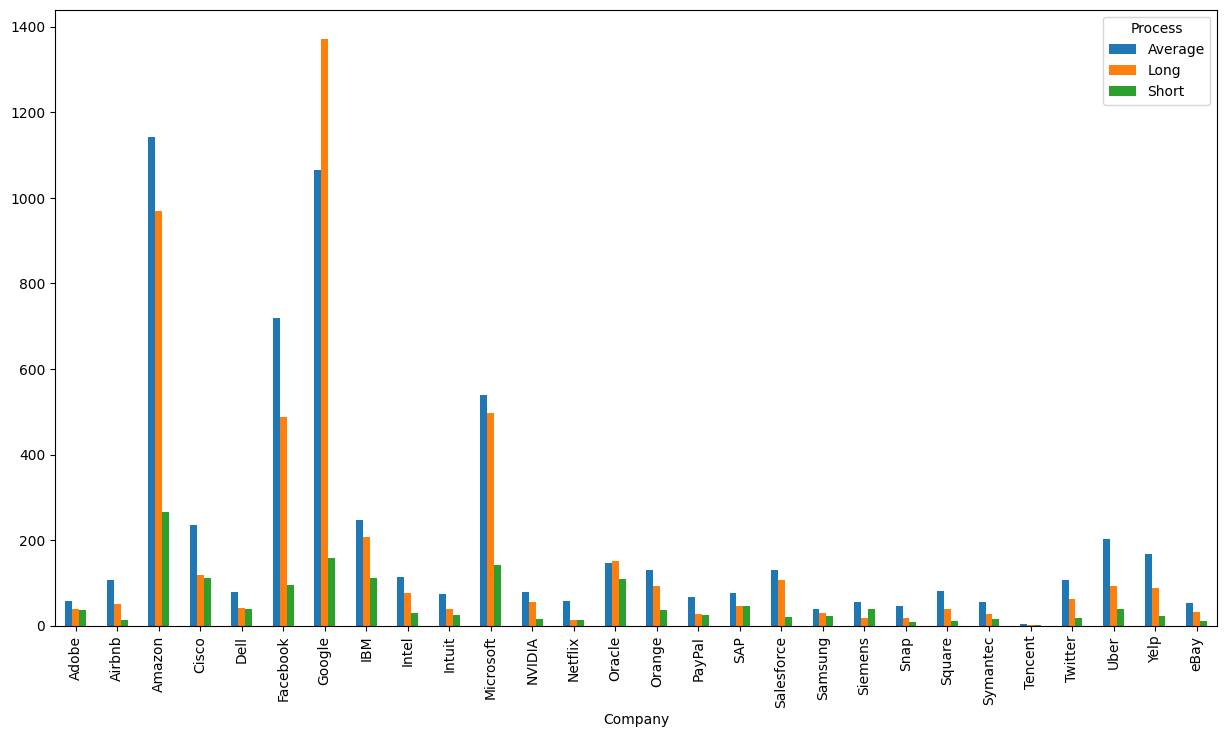

In [43]:
# Group the DataFrame by "Company" and "Process", count the number of elements,
# then unstack by "Process", then plot a bar chart
df.groupby(["Company", "Process"]).size().unstack(level=1).plot(kind="bar", figsize=(15, 8))

In [44]:
# "Process" column is still in df
df.drop(columns=["Process"])
df.columns

Index(['Company', 'Title', 'Job', 'Level', 'Date', 'Upvotes', 'Offer',
       'Experience', 'Difficulty', 'Review', 'Process'],
      dtype='object')

In [45]:
# To make changes to df, set `inplace=True`
df.drop(columns=["Process"], inplace=True)
df.columns
# This is equivalent to
# df = df.drop(columns=["Process"])

Index(['Company', 'Title', 'Job', 'Level', 'Date', 'Upvotes', 'Offer',
       'Experience', 'Difficulty', 'Review'],
      dtype='object')